First let us start with importing all theh necessary libraries:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


Then load the dataset:

In [100]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
file_path = "/content/drive/My Drive/Code/hotel_bookings.csv"
sk_hotel = pd.read_csv(file_path)


Display Basic Info:

In [102]:
sk_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [103]:
sk_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [104]:
sk_hotel.shape

(119390, 32)

As we have got a huge dataset, we will be working on a small sample dataset of 20,000 rows:

In [105]:
sk_hotel_sample = sk_hotel.sample(n=20000, random_state=42)

# Display sample information
print(sk_hotel_sample.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 30946 to 92398
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20000 non-null  object 
 1   is_canceled                     20000 non-null  int64  
 2   lead_time                       20000 non-null  int64  
 3   arrival_date_year               20000 non-null  int64  
 4   arrival_date_month              20000 non-null  object 
 5   arrival_date_week_number        20000 non-null  int64  
 6   arrival_date_day_of_month       20000 non-null  int64  
 7   stays_in_weekend_nights         20000 non-null  int64  
 8   stays_in_week_nights            20000 non-null  int64  
 9   adults                          20000 non-null  int64  
 10  children                        20000 non-null  float64
 11  babies                          20000 non-null  int64  
 12  meal                            2

In [106]:
# Print the shape of the sampled dataset
print("Sampled Data Shape:", sk_hotel_sample.shape)


Sampled Data Shape: (20000, 32)


In [107]:
sk_hotel_sample.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,17225.000000,1155.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.376900,104.676050,2016.158800,27.140950,15.855900,0.933650,2.503350,1.858000,0.104550,0.007650,0.033000,0.08805,0.154100,0.220650,86.786531,186.619048,2.281300,101.535115,0.060250,0.570550
std,0.484622,106.944533,0.708172,13.642382,8.782812,0.994785,1.899571,0.628694,0.400159,0.107666,0.178641,0.82288,1.570789,0.647445,110.535579,130.274355,17.448965,47.748787,0.239213,0.798533
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,67.000000,0.000000,68.445000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,174.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,229.000000,263.500000,0.000000,125.400000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.00000,63.000000,17.000000,531.000000,525.000000,391.000000,451.500000,3.000000,5.000000


In [108]:

duplicate_count = sk_hotel_sample.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 3244


In [109]:
sk_hotel_sample = sk_hotel_sample.drop_duplicates()


In [110]:
# Check for missing values
print(sk_hotel_sample.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              99
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              2350
company                           15731


Let us check missing value by plotting a percentage graph:

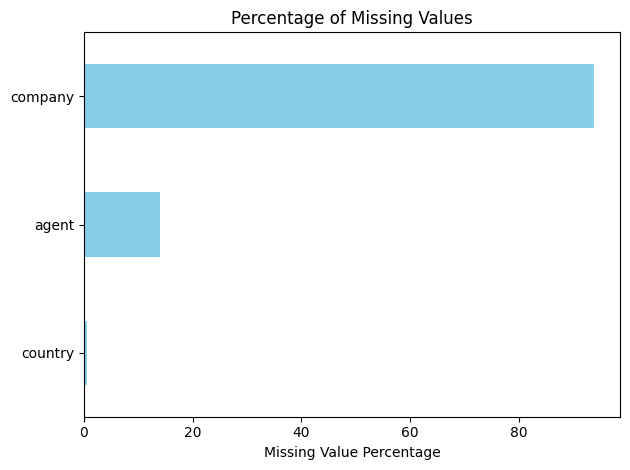

In [111]:
missing_percent = (sk_hotel_sample[['country', 'agent', 'company']].isnull().mean() * 100)
missing_percent.plot(kind='barh', color='skyblue')
plt.title("Percentage of Missing Values")
plt.xlabel("Missing Value Percentage")
plt.tight_layout()
plt.show()


We are going to check whether these columns are going to be useful or not:

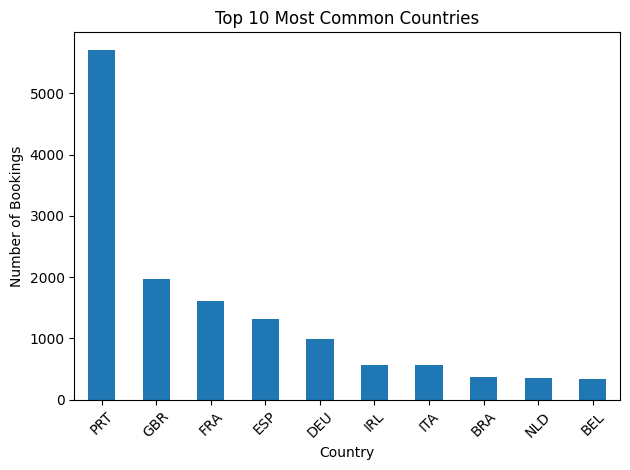

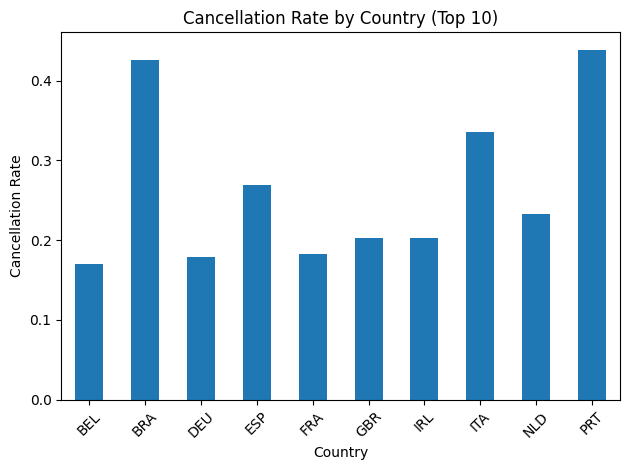

In [112]:
sk_hotel_sample['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Common Countries')
plt.ylabel("Number of Bookings")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_countries = sk_hotel_sample['country'].value_counts().head(10).index
cancel_rate = sk_hotel_sample[sk_hotel_sample['country'].isin(top_countries)].groupby('country')['is_canceled'].mean()

cancel_rate.plot(kind='bar', title='Cancellation Rate by Country (Top 10)')
plt.ylabel('Cancellation Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We identified that the agent, company, and country columns does not provide any good insights, so we will drop these columns..

In [113]:
sk_hotel_sample.drop(columns=['country', 'agent', 'company'], inplace=True)



Let us also check with the other colums are they going to be useful or not:

In [114]:
print(sk_hotel_sample['meal'].value_counts(normalize=True))


meal
BB           0.772559
HB           0.112974
SC           0.102172
Undefined    0.007520
FB           0.004774
Name: proportion, dtype: float64


Over 77% of reservations had the 'BB' (Bed & Breakfast) option, indicating very little variation, so the meal column was removed. Such a distribution has little effect on the model's capacity to differentiate between canceled and non-canceled reservations, and it provides very little gain.

In [115]:
sk_hotel_sample['total_guests'] = sk_hotel_sample['adults'] + sk_hotel_sample['children'] + sk_hotel_sample['babies']


In [116]:
sk_hotel_sample[sk_hotel_sample['adults'] + sk_hotel_sample['children'] + sk_hotel_sample['babies'] == 0].shape


(33, 30)

There are 33 rows with 0 guests (which are likely invalid).Considering above scenerio we will drop these columns:

In [117]:
sk_hotel_sample.drop(columns=['adults', 'children', 'babies', 'meal'], inplace=True)


In [118]:
#Leakage Column

sk_hotel_sample.drop(columns=['reservation_status'], inplace=True)


In [119]:
print(sk_hotel_sample.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
total_guests                      0
dtype: int64


In [120]:
sk_hotel_sample.shape

(16756, 25)

To make dataset more cleaner let us check for the outliers:

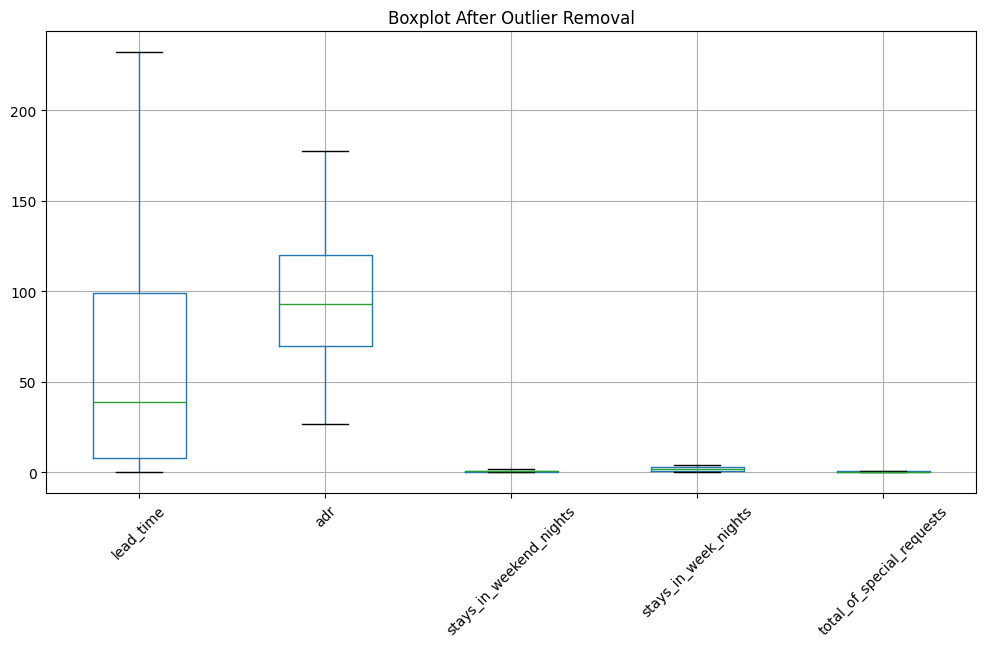

Shape after removing outliers: (9951, 25)


In [121]:
import matplotlib.pyplot as plt

# Updated numerical features
num_features = ['lead_time', 'adr', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'total_of_special_requests']

# Apply stricter IQR filtering (0.75×IQR)
strict_factor = 0.75


for col in num_features:
    Q1 = sk_hotel_sample[col].quantile(0.25)
    Q3 = sk_hotel_sample[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - strict_factor * IQR
    upper_bound = Q3 + strict_factor * IQR
    sk_hotel_sample = sk_hotel_sample[(sk_hotel_sample[col] >= lower_bound) & (sk_hotel_sample[col] <= upper_bound)]

# Plot boxplot after outlier removal
plt.figure(figsize=(12, 6))
sk_hotel_sample[num_features].boxplot()
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Show new shape
print("Shape after removing outliers:", sk_hotel_sample.shape)


Feature Engineer

In [122]:
sk_hotel_sample.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status_date'],
      dtype='object')

Lets us ensure that the datetime is in correct format:

In [123]:
sk_hotel_sample['reservation_status_date'] = pd.to_datetime(sk_hotel_sample['reservation_status_date'])

sk_hotel_sample['res_year'] = sk_hotel_sample['reservation_status_date'].dt.year
sk_hotel_sample['res_month'] = sk_hotel_sample['reservation_status_date'].dt.month
sk_hotel_sample['res_dayofweek'] = sk_hotel_sample['reservation_status_date'].dt.dayofweek
sk_hotel_sample['res_weekofyear'] = sk_hotel_sample['reservation_status_date'].dt.isocalendar().week.astype(int)


In [124]:
def classify_stay_type(row):
    if row['stays_in_weekend_nights'] > row['stays_in_week_nights']:
        return 'Weekend'
    elif row['stays_in_weekend_nights'] < row['stays_in_week_nights']:
        return 'Weekday'
    else:
        return 'Balanced'

sk_hotel_sample['stay_type'] = sk_hotel_sample.apply(classify_stay_type, axis=1)

# Here we will check value counts
print(sk_hotel_sample['stay_type'].value_counts())


stay_type
Weekday     7152
Weekend     1403
Balanced    1396
Name: count, dtype: int64


In [125]:
print(sk_hotel_sample.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 40207 to 92398
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           9951 non-null   object        
 1   is_canceled                     9951 non-null   int64         
 2   lead_time                       9951 non-null   int64         
 3   arrival_date_year               9951 non-null   int64         
 4   arrival_date_month              9951 non-null   object        
 5   arrival_date_week_number        9951 non-null   int64         
 6   arrival_date_day_of_month       9951 non-null   int64         
 7   stays_in_weekend_nights         9951 non-null   int64         
 8   stays_in_week_nights            9951 non-null   int64         
 9   market_segment                  9951 non-null   object        
 10  distribution_channel            9951 non-null   object        
 11  is_r

EDA

<ipython-input-126-fbd26ae369cb>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = sk_hotel_sample.resample('M', on='reservation_status_date')['is_canceled'].count()


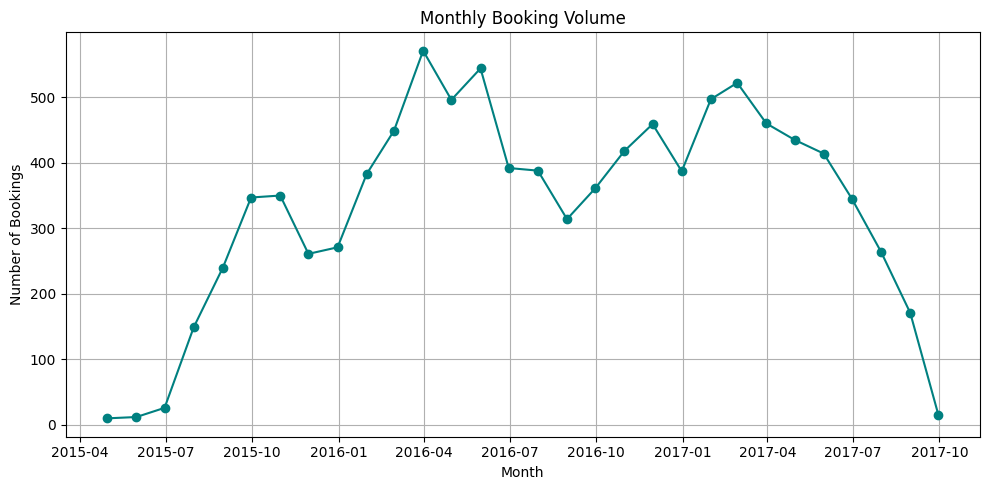

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# This converts date column:
sk_hotel_sample['reservation_status_date'] = pd.to_datetime(sk_hotel_sample['reservation_status_date'])

monthly_trend = sk_hotel_sample.resample('M', on='reservation_status_date')['is_canceled'].count()

plt.figure(figsize=(10, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='teal')
plt.title("Monthly Booking Volume")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(True)
plt.tight_layout()
plt.show()


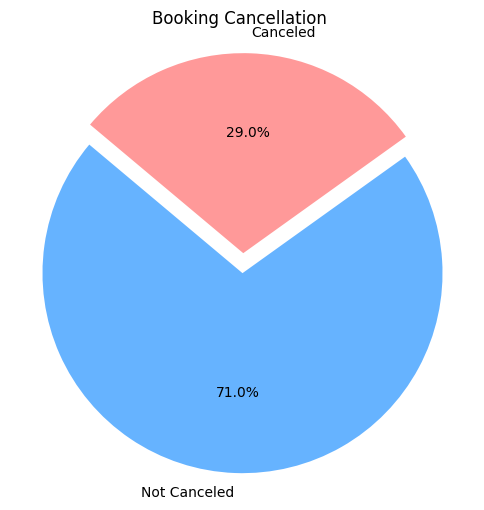

In [127]:
cancel_counts = sk_hotel_sample['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(cancel_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0.1])
plt.title('Booking Cancellation ')
plt.axis('equal')
plt.show()


<ipython-input-128-64b567fa4419>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='is_canceled', data=sk_hotel_sample, palette='Set2', errorbar=None)


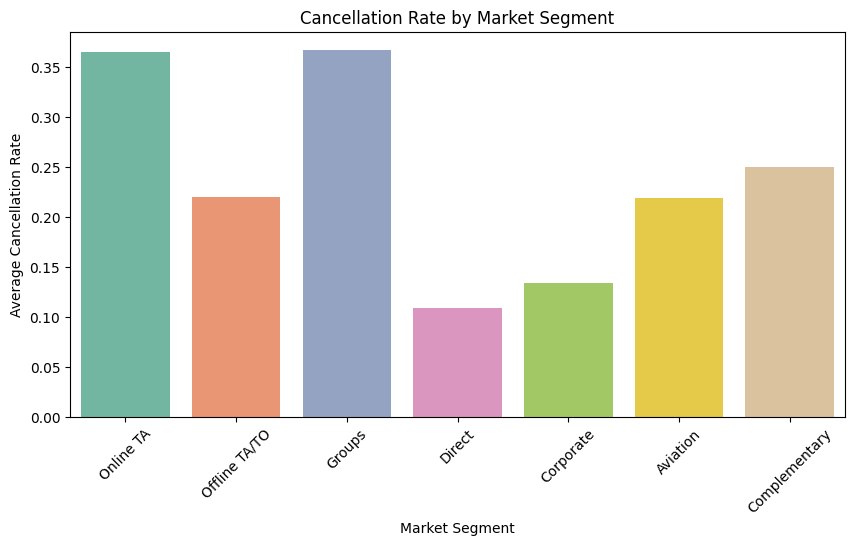

In [128]:
plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='is_canceled', data=sk_hotel_sample, palette='Set2', errorbar=None)
plt.xticks(rotation=45)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Cancellation Rate')
plt.show()


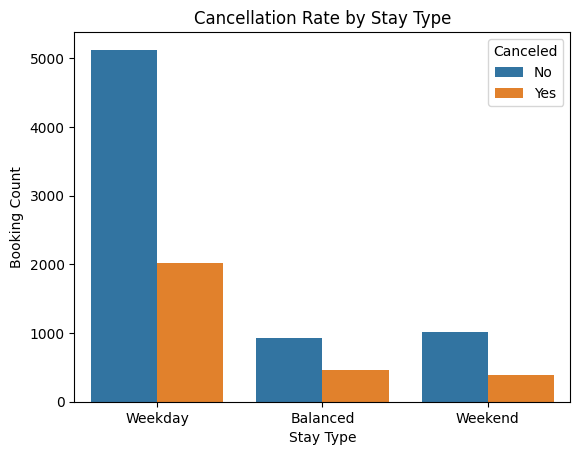

In [129]:
sns.countplot(x='stay_type', hue='is_canceled', data=sk_hotel_sample)
plt.title("Cancellation Rate by Stay Type")
plt.xlabel("Stay Type")
plt.ylabel("Booking Count")
plt.legend(title="Canceled", labels=["No", "Yes"])
plt.show()


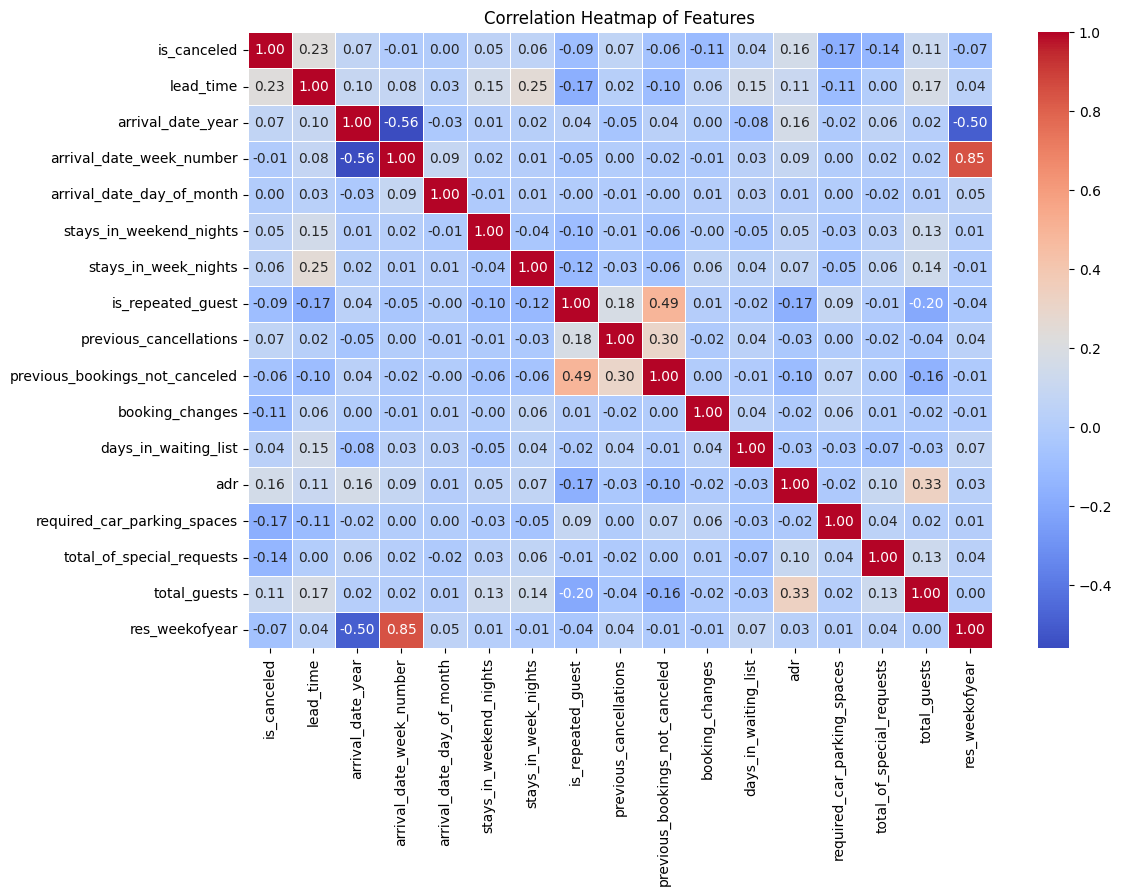

In [130]:
# Compute correlation matrix (only numeric features)
numeric_df = sk_hotel_sample.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


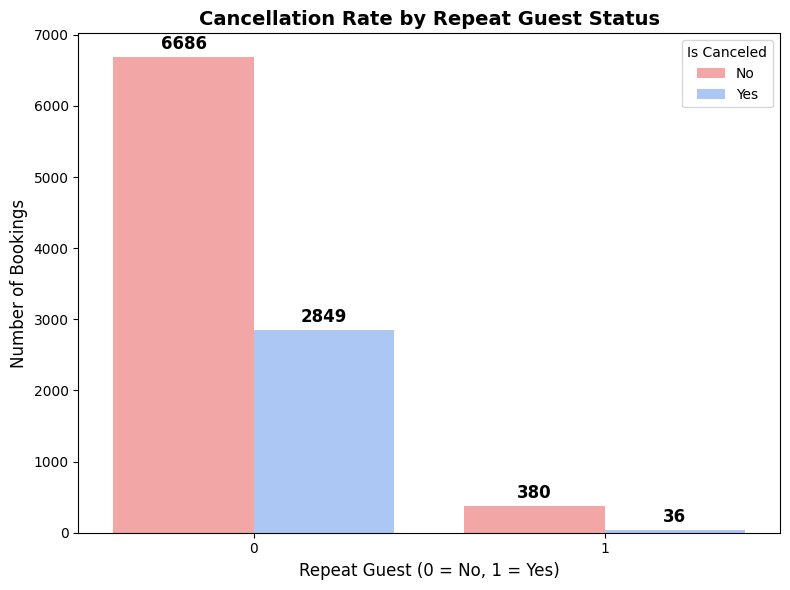

In [131]:
#sns.set_style("white")  # or use 'ticks' for subtle lines

plt.figure(figsize=(8, 6))
ax = sns.countplot(data= sk_hotel_sample,
                   x='is_repeated_guest',
                   hue='is_canceled',
                   palette=['#FF9999', '#A0C4FF'])

for container in ax.containers:
    ax.bar_label(container,
                 fmt='%d',
                 label_type='edge',
                 fontsize=12,
                 fontweight='bold',
                 color='black',
                 padding=3)

plt.title("Cancellation Rate by Repeat Guest Status", fontsize=14, fontweight='bold')
plt.xlabel("Repeat Guest (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)

ax.grid(False)

plt.legend(title="Is Canceled", labels=["No", "Yes"], loc='upper right')

plt.tight_layout()
plt.show()


Now we will start with Train Test Split the dataset

In [132]:
# Let us first define X and y:
X = sk_hotel_sample.drop(columns=['is_canceled', 'reservation_status_date'])
y = sk_hotel_sample['is_canceled']


In [133]:
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




In [134]:
# This will help us to check the shape of train and test sets:
# And Display proportions:
train_size = len(X_train)
test_size = len(X_test)
total = train_size + test_size

print(f"Train set size: {train_size} ({(train_size/total)*100:.2f}%)")
print(f"Test set size: {test_size} ({(test_size/total)*100:.2f}%)")
print(f"Total samples: {total}")


Train set size: 7960 (79.99%)
Test set size: 1991 (20.01%)
Total samples: 9951


In [135]:
print("Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True).round(3))

print("\n Class Distribution in Test Set:")
print(y_test.value_counts(normalize=True).round(3))


Class Distribution in Training Set:
is_canceled
0    0.71
1    0.29
Name: proportion, dtype: float64

 Class Distribution in Test Set:
is_canceled
0    0.71
1    0.29
Name: proportion, dtype: float64


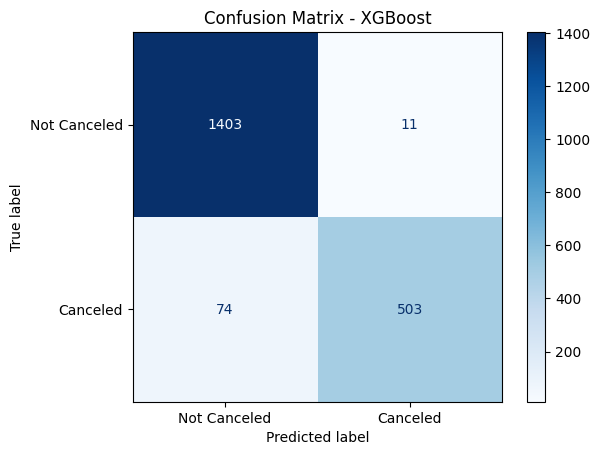

In [136]:
# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Canceled", "Canceled"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

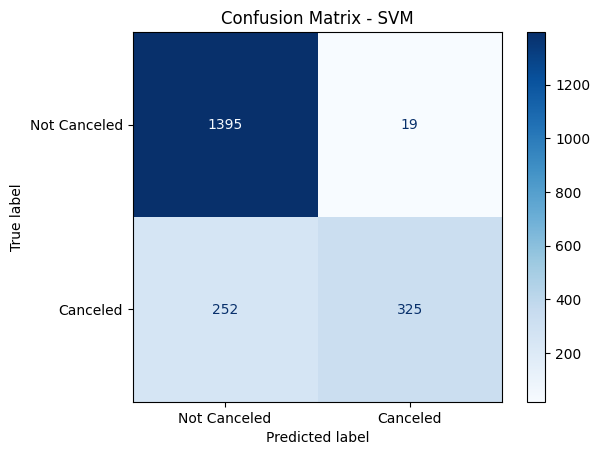

In [137]:
# Here let us ensure that we create an SVM pipeline:
# and now we can use svm_pipeline.fit():
svm_pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Not Canceled", "Canceled"])
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


Same we will do for the rest of the models:

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


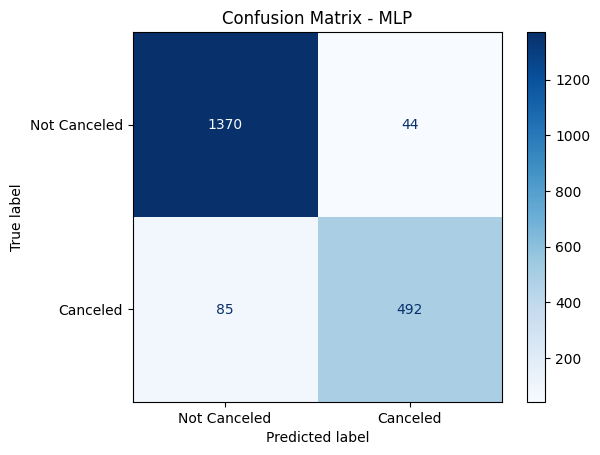

In [138]:
mlp_pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=42)) # Define the mlp_pipeline variable

mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=["Not Canceled", "Canceled"])
disp_mlp.plot(cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.show()

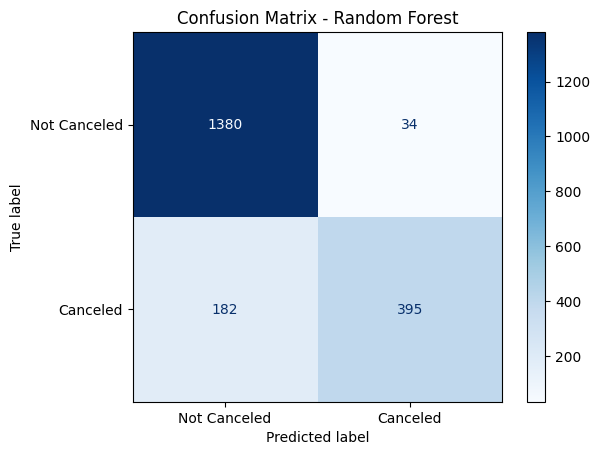

In [139]:
rf_pipeline = make_pipeline(RandomForestClassifier(random_state=42))

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Canceled", "Canceled"])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


Here we will start with Model Evaluation:

In [140]:
# Firstly, we will train XGBoost model
#Then predict on test data
#And finally, evaluate model

#we will follow the above steps for the rest of the models:


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Model Accuracy: 0.957307885484681
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1414
           1       0.98      0.87      0.92       577

    accuracy                           0.96      1991
   macro avg       0.96      0.93      0.95      1991
weighted avg       0.96      0.96      0.96      1991



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [141]:
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.7101958814665997
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1414
           1       0.00      0.00      0.00       577

    accuracy                           0.71      1991
   macro avg       0.36      0.50      0.42      1991
weighted avg       0.50      0.71      0.59      1991



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [142]:
#There is a little change before the training we define the MLP model:
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32),
                          activation='relu',
                          solver='adam',
                          max_iter=500,
                          random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.7263
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84      1414
           1       0.97      0.06      0.11       577

    accuracy                           0.73      1991
   macro avg       0.85      0.53      0.47      1991
weighted avg       0.79      0.73      0.63      1991



In [143]:

from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.891511803114013
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1414
           1       0.92      0.68      0.79       577

    accuracy                           0.89      1991
   macro avg       0.90      0.83      0.86      1991
weighted avg       0.89      0.89      0.89      1991



The above are results of the models before tuning. So, now let us see how the models perform better after tuning:

In [144]:
#To start with this we will first:
# Define parameter grid
# Initialize model
# GridSearch with 5-fold cross-validation
# Ensure it properly fits the model
# Select best parameters
# Evaluate on test set
# And finally, generate the report.
# We will follow these steps for all the models.

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(" Report (XGBoost):")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}

 Accuracy: 0.9608
 Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1414
           1       0.99      0.88      0.93       577

    accuracy                           0.96      1991
   macro avg       0.97      0.94      0.95      1991
weighted avg       0.96      0.96      0.96      1991



In [145]:
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200]
}

mlp = MLPClassifier(random_state=42)

mlp_grid = GridSearchCV(mlp, mlp_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
mlp_grid.fit(X_train, y_train)

print("Best Parameters (MLP):", mlp_grid.best_params_)

best_mlp = mlp_grid.best_estimator_
mlp_pred = best_mlp.predict(X_test)

print(f"\n Accuracy (MLP): {accuracy_score(y_test, mlp_pred):.4f}")
print("Report (MLP):")
print(classification_report(y_test, mlp_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters (MLP): {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

 Accuracy (MLP): 0.7916
Report (MLP):
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1414
           1       0.76      0.41      0.53       577

    accuracy                           0.79      1991
   macro avg       0.78      0.68      0.70      1991
weighted avg       0.79      0.79      0.77      1991



In [146]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

svm = SVC(probability=True)

svm_grid = GridSearchCV(svm, svm_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("Best Parameters (SVM):", svm_grid.best_params_)

best_svm = svm_grid.best_estimator_
svm_pred = best_svm.predict(X_test)

print(f"\n Accuracy (SVM): {accuracy_score(y_test, svm_pred):.4f}")
print("Report(SVM):")
print(classification_report(y_test, svm_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (SVM): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

 Accuracy (SVM): 0.8232
Report(SVM):
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1414
           1       0.87      0.46      0.60       577

    accuracy                           0.82      1991
   macro avg       0.84      0.72      0.74      1991
weighted avg       0.83      0.82      0.80      1991



In [147]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                       scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best Parameters (Random Forest):", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)

print(f"\n Accuracy (Random Forest): {accuracy_score(y_test, rf_pred):.4f}")
print(" Report(Random Forest):")
print(classification_report(y_test, rf_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Random Forest): {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 Accuracy (Random Forest): 0.8950
 Report(Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1414
           1       0.91      0.71      0.80       577

    accuracy                           0.90      1991
   macro avg       0.90      0.84      0.86      1991
weighted avg       0.90      0.90      0.89      1991



Finally, we will compare the above results:

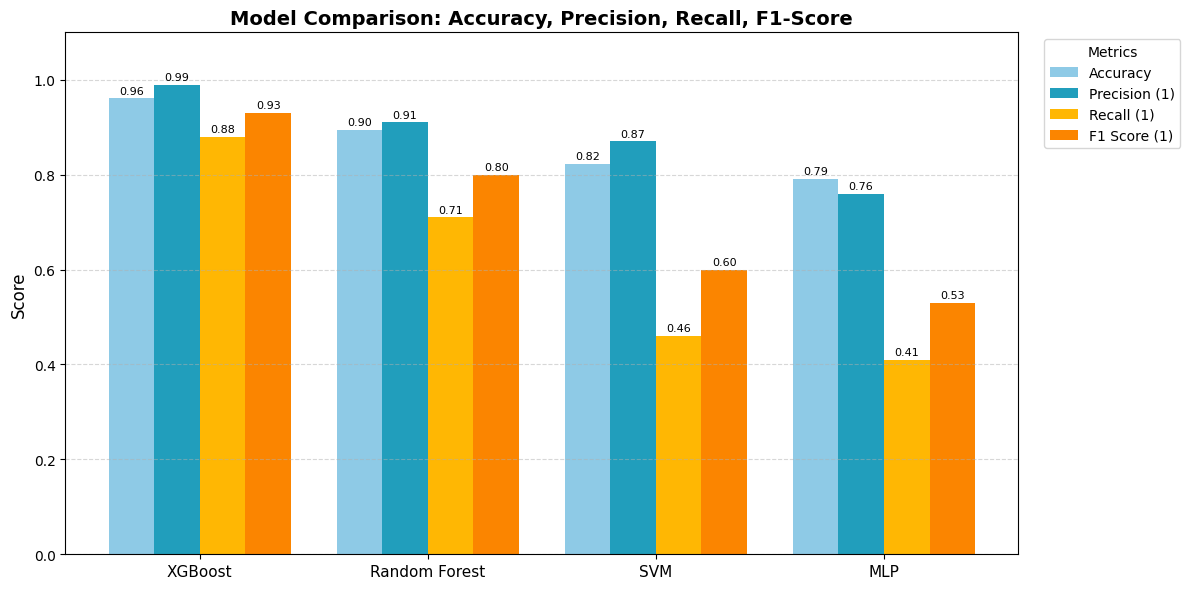

In [148]:
models = ['XGBoost', 'Random Forest', 'SVM', 'MLP']

# Metric values
accuracy =     [0.9608, 0.8950, 0.8232, 0.7916]
precision_1 =  [0.99,   0.91,   0.87,   0.76]
recall_1 =     [0.88,   0.71,   0.46,   0.41]
f1_score_1 =   [0.93,   0.80,   0.60,   0.53]
metrics = np.array([accuracy, precision_1, recall_1, f1_score_1])
metric_names = ['Accuracy', 'Precision (1)', 'Recall (1)', 'F1 Score (1)']
colors = ['#8ecae6', '#219ebc', '#ffb703', '#fb8500']
x = np.arange(len(models))
width = 0.2
plt.figure(figsize=(12, 6))
for i in range(metrics.shape[0]):
    plt.bar(x + i*width, metrics[i], width, label=metric_names[i], color=colors[i])
    for j in range(len(models)):
        plt.text(x[j] + i*width, metrics[i][j] + 0.01, f"{metrics[i][j]:.2f}", ha='center', fontsize=8)
plt.xticks(x + width * 1.5, models, fontsize=11)
plt.ylim(0, 1.1)
plt.ylabel("Score", fontsize=12)
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score", fontsize=14, weight='bold')
plt.legend(title="Metrics", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
